In [484]:
import numpy as np

In [485]:
x0_1=-0.7
y0_1=0
x0_2=0.7
y0_2=0

theta_1 = 0
theta_2 = 0
v0_1=0
v0_2=0
#v0x_1=v0_1*np.cos(theta_1)
#v0y_1=v0_1*np.sin(theta_1)
v0x_1=0
v0y_1=0
#v0x_2=v0_2*np.cos(theta_2)
#v0y_2=v0_2*np.sin(theta_2)
v0x_2=0
v0y_2=0

u0 = np.array([x0_1,v0x_1,y0_1,v0y_1,x0_2,v0x_2,y0_2,v0y_2])

w = 1
l0 = 1

tstop = 50
divisiones = 1000
t=np.arange(0.,tstop,1/divisiones)

In [486]:
def resorte(u,t,w,l0):
    l=np.sqrt((u[4]-u[0])**2+(u[6]-u[2])**2)
    #deriv = np.array([u[1],(w**2)*(l-l0)*(u[4]-u[0])/l,u[3],(w**2)*(l-l0)*(u[6]-u[2])/l,u[5],-(w**2)*(l-l0)*(u[4]-u[0])/l,u[7],-(w**2)*(l-l0)*(u[6]-u[2])/l])
    deriv = np.array([u[1],(w**2)*(l-l0)*(u[4]-u[0]),u[3],(w**2)*(l-l0)*(u[6]-u[2]),u[5],-(w**2)*(l-l0)*(u[4]-u[0]),u[7],-(w**2)*(l-l0)*(u[6]-u[2])])
    return deriv

In [487]:
def runge_kutta_4to(f_user, u0, t, *args):

    n = t.size
    neq = u0.size
    u = np.zeros((n, neq))

    u[0] = u0
    
    dt = t[1]-t[0]
    
    for i in range(n-1):
        k1 = f_user(u[i], t[i],*args)
        k2 = f_user(u[i]+(1/2)*k1*dt, t[i+1]+ (1/2)*dt,*args )
        k3 = f_user(u[i]+(1/2)*k2*dt, t[i+1]+ (1/2)*dt,*args )
        k4 = f_user(u[i]+ k3*dt, t[i+1]+ dt,*args)
        u[i+1] = u[i] + (1/6)*dt*(k1+2*k2+2*k3+k4)
    return u

In [488]:
def Emec(u,w,l0):
    l=np.sqrt((u[:,4]-u[:,0])**2+(u[:,6]-u[:,2])**2)
    r1=np.sqrt(u[:,1]**2+u[:,3]**2)
    r2=np.sqrt(u[:,5]**2+u[:,7]**2)
    K=(1/2)*r1**2+(1/2)*r2**2
    U=(1/2)*(w**2)*((l-l0)**2)+(1/2)*(w**2)*((l-l0)**2)
    E=K+U
    return E,K,U

In [489]:
res = runge_kutta_4to(resorte,u0,t,w,l0)
x1 = res[:,0]
x2 = res[:,4]
y1 = res[:,2]
y2 = res[:,6]
xcm = (x1+x2)/2
ycm = (y1+y2)/2
E1,K,U = Emec(res,w,l0)
print(x2,x1,xcm,ycm)

[0.7        0.69999972 0.69999888 ... 0.6610067  0.66120234 0.66139755] [-0.7        -0.69999972 -0.69999888 ... -0.6610067  -0.66120234
 -0.66139755] [0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]


In [490]:
def Vcm(x1,x2,y1,y2,t):
    n=t.size
    Deltat=np.zeros((n,1))
    Vxcm=np.zeros((n,1))
    Vycm=np.zeros((n,1))
    xcm = (x2+x1)/2
    ycm = (y2+y1)/2
    for i in range(n-1):
        Deltat[i] = t[i+1]-t[i]
        Vxcm[i] = xcm[i]/Deltat[i]
        Vycm[i] = ycm[i]/Deltat[i]
    return Vxcm,Vycm,xcm,ycm

In [491]:
Vcm = Vcm(x1,x2,y1,y2,t)
print(Vcm)

(array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))


In [492]:
import matplotlib.pyplot as plt

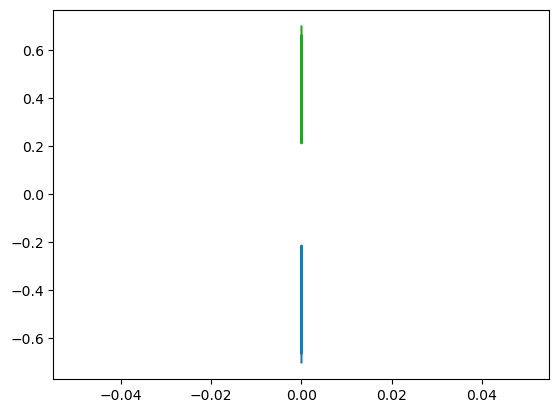

In [493]:
plt.plot(y1,x1)
plt.plot(Vcm[3],Vcm[2])
plt.plot(y2,x2)
plt.show()

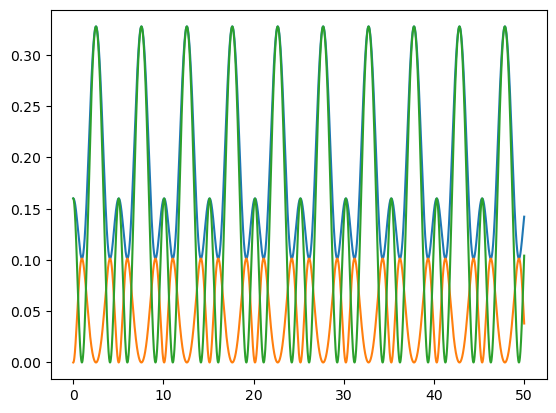

In [494]:
plt.plot(t,E1)
plt.plot(t,K)
plt.plot(t,U)


plt.show()

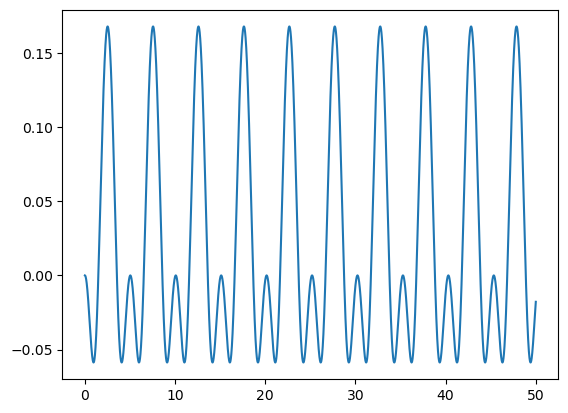

In [495]:
plt.plot(t,E1-E1[0])
plt.show()

In [496]:
print(E1-E1[0])

[ 0.00000000e+00 -1.34399928e-07 -5.37598853e-07 ... -1.79504900e-02
 -1.78650399e-02 -1.77797218e-02]


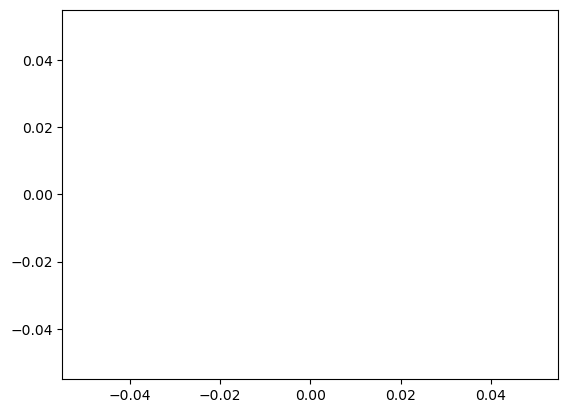

In [497]:
plt.plot(Vcm[0],Vcm[1])